<a href="https://colab.research.google.com/github/judeavery/CS4372Assignment1/blob/main/notebooks/main_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from ucimlrepo import fetch_ucirepo


# Load dataset

url = "https://raw.githubusercontent.com/judeavery/CS4372Assignment1/refs/heads/main/data/day.csv"

df = pd.read_csv(url)
df.head()

X = bike_sharing.data.features   # predictors
y = bike_sharing.data.targets    # target

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nPreview:")
print(pd.concat([X, y], axis=1).head())




Features shape: (17379, 13)
Target shape: (17379, 1)

Preview:
       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  


In [3]:
# -------------------------------------------------------------------
# 2) Check for nulls / missing data
# -------------------------------------------------------------------
print("\nMissing values per column:")
print(X.isnull().sum())




Missing values per column:
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64


In [4]:
# -------------------------------------------------------------------
# 3) Examine attributes and target
# -------------------------------------------------------------------
print("\nSummary statistics:")
print(X.describe())

# Combine features + target for easier exploration
df = pd.concat([X, y], axis=1)

# Target variable is usually 'cnt' (total rentals)
print("\nTarget column preview:")
print(y.head())




Summary statistics:
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465

In [5]:
# -------------------------------------------------------------------
# 4) Handle categorical variables
# -------------------------------------------------------------------
# Variables like 'season', 'mnth', 'weekday', 'weathersit' are categorical
categorical_cols = ['season', 'year', 'mnth', 'hour', 'weekday','weekday','weathersit']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nData after encoding categorical variables:", df.shape)




Data after encoding categorical variables: (17379, 33)


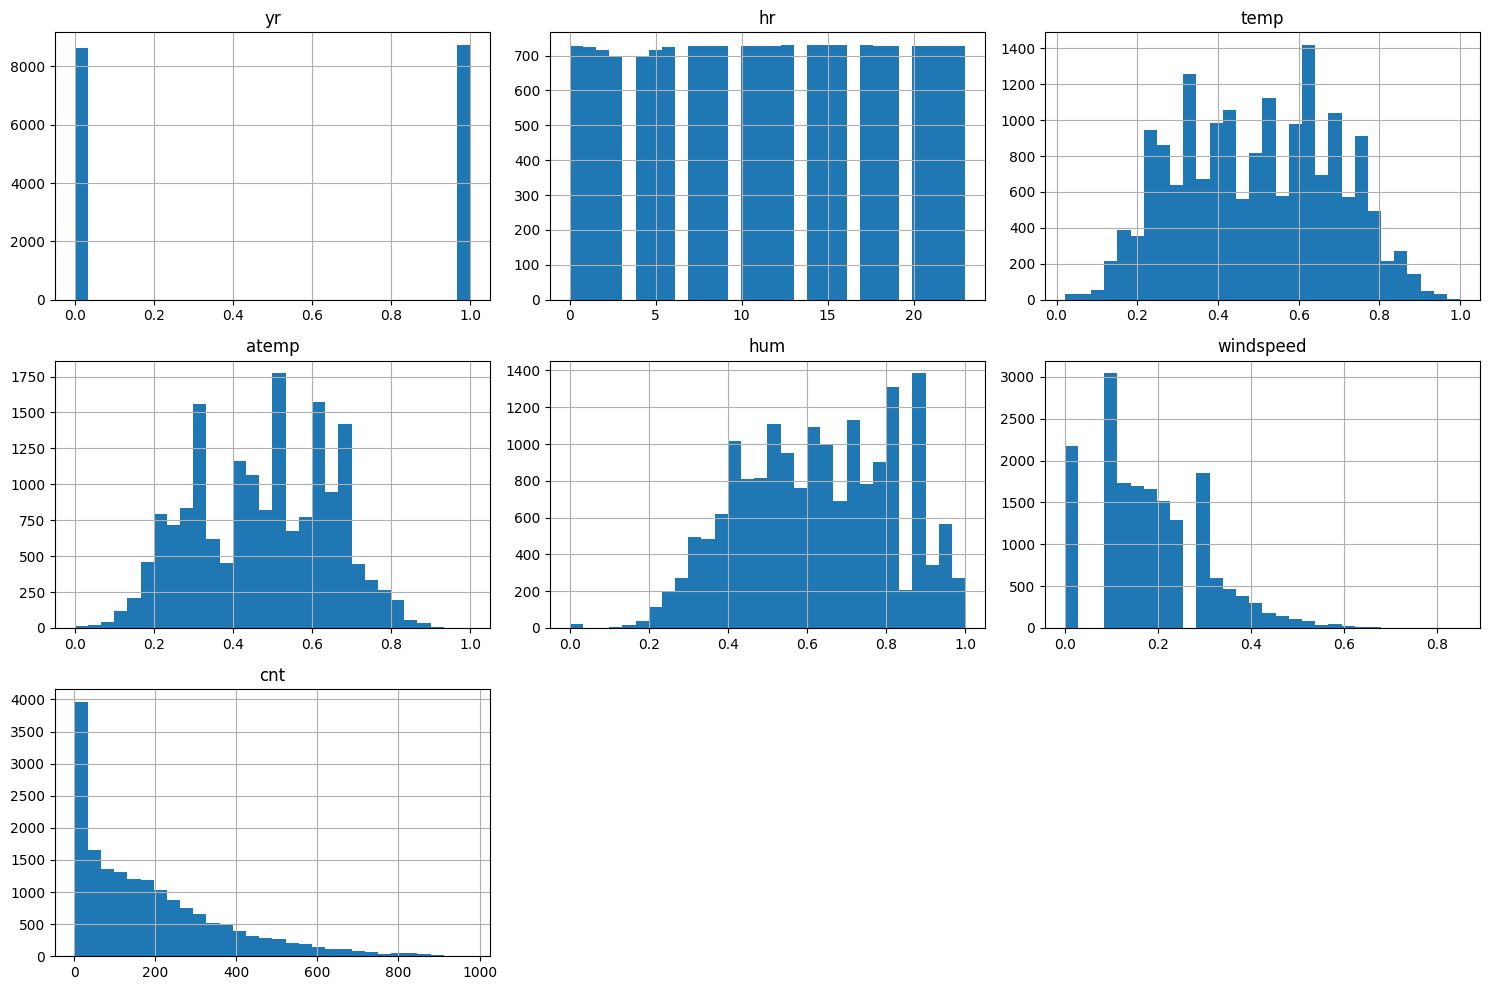

In [6]:
# -------------------------------------------------------------------
# 5) Distribution check
# -------------------------------------------------------------------
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Note: many attributes won't be normally distributed
# because rentals depend on seasonality, weather, holidays, etc.



In [7]:
# -------------------------------------------------------------------
# 6) Standardize/normalize
# -------------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('cnt', axis=1))
y_values = df['cnt'].values



ValueError: could not convert string to float: '2011-01-01'

In [ ]:
# -------------------------------------------------------------------
# 7) Correlation analysis
# -------------------------------------------------------------------
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

# Correlation with target
print("\nCorrelation with target (cnt):")
print(corr['cnt'].sort_values(ascending=False))



In [ ]:
# -------------------------------------------------------------------
# 8) Identify important attributes (example: temp, atemp, hum, windspeed)
# -------------------------------------------------------------------
important_features = ['temp','atemp','hum','windspeed']
print("\nSelected important features:", important_features)



In [ ]:
# -------------------------------------------------------------------
# 9) Train/test split
# -------------------------------------------------------------------
X_final = df.drop('cnt', axis=1)
y_final = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)

In [ ]:
# -------------------------------
# 9. SGDRegressor pipeline + hyperparameter tuning
# -------------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import json
import joblib

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(random_state=RANDOM_STATE, early_stopping=True, tol=1e-3))
])

# Parameter grid to search (extensive; may take time)
param_grid = {
    'sgd__loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd__alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'sgd__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'sgd__eta0': [0.001, 0.01, 0.1],
    'sgd__max_iter': [1000, 3000],
    'sgd__power_t': [0.25, 0.5, 0.75]  # used when learning_rate='invscaling'
}

# Grid search with 5-fold CV; scoring by neg MSE
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

print("\nStarting GridSearchCV for SGDRegressor (this may take a while)...")
grid.fit(X_train, y_train)

print("\nBest parameters found:")
print(grid.best_params_)
print("Best CV score (neg MSE):", grid.best_score_)

# Save CV results to CSV for your experiments log
results_df = pd.DataFrame(grid.cv_results_)
results_csv = RESULTS_LOG if 'RESULTS_LOG' in globals() else 'sgd_experiments.csv'
results_df.to_csv(results_csv, index=False)
print("Saved GridSearchCV results to", results_csv)

# Evaluate best model
best_model = grid.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

metrics_sgd = {
    'train_mse': mean_squared_error(y_train, y_pred_train),
    'test_mse': mean_squared_error(y_test, y_pred_test),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_r2': r2_score(y_test, y_pred_test)
}

print("\nSGDRegressor performance metrics:")
print(json.dumps(metrics_sgd, indent=2))

# Save the trained sklearn pipeline
joblib.dump(best_model, 'best_sgd_model.joblib')
print("Saved best SGD pipeline to best_sgd_model.joblib")

df_enc = df.copy()   # just to match naming in continuation

# -------------------------------
# 10. OLS with statsmodels
# -------------------------------
import statsmodels.api as sm

# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Save OLS summary to file
with open('ols_summary.txt', 'w') as f:
    f.write(ols_model.summary().as_text())
print("\nOLS summary saved to ols_summary.txt")

# Print key OLS diagnostics to console (also saved)
print("\nOLS model summary:")
print(ols_model.summary())

# Evaluate OLS on test set
X_test_sm = sm.add_constant(X_test)
y_pred_ols = ols_model.predict(X_test_sm)

metrics_ols = {
    'test_mse': mean_squared_error(y_test, y_pred_ols),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_ols)),
    'test_mae': mean_absolute_error(y_test, y_pred_ols),
    'test_r2': r2_score(y_test, y_pred_ols)
}
print("\nOLS performance metrics:")
print(json.dumps(metrics_ols, indent=2))

# -------------------------------
# 11. Plots for analysis (pred vs actual, residuals)
# -------------------------------
import matplotlib.pyplot as plt

# Predicted vs Actual (SGD)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual cnt')
plt.ylabel('Predicted cnt (SGD)')
plt.title('SGDRegressor: Predicted vs Actual')
plt.savefig('sgd_pred_vs_actual.png', bbox_inches='tight')
plt.close()
print("Saved sgd_pred_vs_actual.png")

# Residuals (SGD)
residuals_sgd = y_test - y_pred_test
plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, residuals_sgd, alpha=0.6)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('SGD Residuals vs Predicted')
plt.savefig('sgd_residuals.png', bbox_inches='tight')
plt.close()
print("Saved sgd_residuals.png")

# Predicted vs Actual (OLS)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ols, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual cnt')
plt.ylabel('Predicted cnt (OLS)')
plt.title('OLS: Predicted vs Actual')
plt.savefig('ols_pred_vs_actual.png', bbox_inches='tight')
plt.close()
print("Saved ols_pred_vs_actual.png")

# Residuals (OLS)
residuals_ols = y_test - y_pred_ols
plt.figure(figsize=(6,4))
plt.scatter(y_pred_ols, residuals_ols, alpha=0.6)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('OLS Residuals vs Predicted')
plt.savefig('ols_residuals.png', bbox_inches='tight')
plt.close()
print("Saved ols_residuals.png")

# -------------------------------
# 12. Save metrics and experiment summary
# -------------------------------
summary = {
    'selected_features': selected_feats,
    'sgd': metrics_sgd,
    'ols': metrics_ols,
    'best_sgd_params': grid.best_params_
}

with open('metrics_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("Saved metrics_summary.json")

# quick file list to inspect
print("\nFiles produced (check your working dir):")
for fn in ['sgd_pred_vs_actual.png', 'sgd_residuals.png', 'ols_pred_vs_actual.png',
           'ols_residuals.png', 'ols_summary.txt', 'metrics_summary.json',
           'best_sgd_model.joblib', results_csv]:
    print("-", fn)